<a href="https://colab.research.google.com/github/trantoan62/AI-ANN-TranQuocToan/blob/main/3rdDegreesRoboticArm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#l1 = 10, l2 = 40, l3 = 20

In [ ]:
# bài 5: robot 3 bậc tự do như trên + 1 bậc trên oxy, tt1, tt2, tt3 => px, py, góc phi là góc định hướng
# px = l1.c1 + l2.c12 + l3.c123
# px = l1.c1 + l2.c12 + l3.c123
# phi = tt1 + tt2 + tt3

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [7]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [8]:
l1 = 10
l2 = 40
L3 = 20
px = []
py= []
theta= []
tt1 =[]
tt2 =[]
tt3 =[]

In [9]:
for i in np.arange(0, 360, 5):
    for j in np.arange(0, 360, 5):
      for k in np.arange(0, 360, 5):
              x = l1*np.cos(np.radians(i)) + l2*np.cos(np.radians(i+j)) + L3*np.cos(np.radians(i+j+k))
              y = l1*np.sin(np.radians(i)) + l2*np.sin(np.radians(i+j)) + L3*np.sin(np.radians(i+j+k))
              tt_sum = (i+j+k)%360
              px.append(x)
              py.append(y)
              theta.append(tt_sum)
              tt1.append(i)
              tt2.append(j)
              tt3.append(k)

In [10]:
Px = np.array([px])
Py = np.array([py])
Tt_sum = np.array([theta])
Tt1= np.array([tt1])
Tt2 = np.array([tt2])
Tt3 = np.array([tt3])

In [11]:
Px.shape

(1, 373248)

In [12]:
Tt1 = Tt1.astype('float32')
Tt2 = Tt2.astype('float32')
Tt3 = Tt3.astype('float32')

In [13]:
Tt1 /= 360
Tt2 /= 360
Tt3 /= 360

In [14]:
result = np.concatenate((Tt1.T, Tt2.T, Tt3.T),axis =1)
train = np.concatenate((Px.T, Py.T, Tt_sum.T),axis =1)
result.shape

(373248, 3)

In [15]:
x_train = result[0:261273,:]
y_train = train[0:261273,:]
x_test = result[261273:373248,:]
y_test = train[261273:373248,:]

In [16]:
model=Sequential()
model.add(Dense(512, activation='relu', input_shape=(3,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2048      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 266,243
Trainable params: 266,243
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss = ['mae'], 
              optimizer = 'Adam', 
              metrics = ['accuracy'])

In [19]:
history = model.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, validation_data=(x_test,y_test))

Epoch 1/30
2042/2042 [==============================] - 18s 9ms/step - loss: 7.5767 - accuracy: 0.9369 - val_loss: 24.1546 - val_accuracy: 0.9246
Epoch 2/30
2042/2042 [==============================] - 17s 8ms/step - loss: 6.8291 - accuracy: 0.9372 - val_loss: 22.8380 - val_accuracy: 0.9253
Epoch 3/30
2042/2042 [==============================] - 17s 8ms/step - loss: 6.1816 - accuracy: 0.9390 - val_loss: 21.8576 - val_accuracy: 0.9291
Epoch 4/30
2042/2042 [==============================] - 17s 8ms/step - loss: 5.7420 - accuracy: 0.9410 - val_loss: 20.0662 - val_accuracy: 0.9278
Epoch 5/30
2042/2042 [==============================] - 17s 9ms/step - loss: 5.3136 - accuracy: 0.9438 - val_loss: 17.8938 - val_accuracy: 0.9296
Epoch 6/30
2042/2042 [==============================] - 18s 9ms/step - loss: 4.9369 - accuracy: 0.9484 - val_loss: 16.1930 - val_accuracy: 0.9325
Epoch 7/30
2042/2042 [==============================] - 17s 8ms/step - loss: 4.5585 - accuracy: 0.9542 - val_loss: 14.5391 -

In [20]:
Score = model.evaluate(x_test,y_test,verbose = 1)

3500/3500 [==============================] - 11s 3ms/step - loss: 7.6863 - accuracy: 0.9698


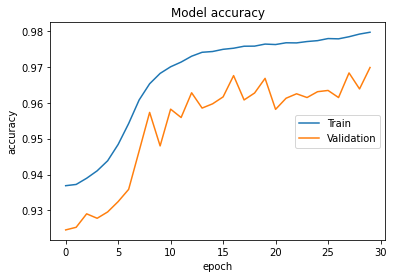

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc ='center right')
plt.show()

In [22]:
model.save('3rdDegreesRoboticArm.h5')

In [ ]:
y_pred = model.predict(x_train)